In [1]:
import numpy as np

In [2]:
import sunpy.map
from scipy.io import readsav

In [3]:
import matplotlib.pyplot as plt

In [13]:
fits_file_path = "F:\\Train\\X_train\\mdi_bmr_ind_19970105_2223.fits"

magnetogram_map = sunpy.map.Map(fits_file_path)


In [14]:
data = magnetogram_map.data

In [15]:
data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

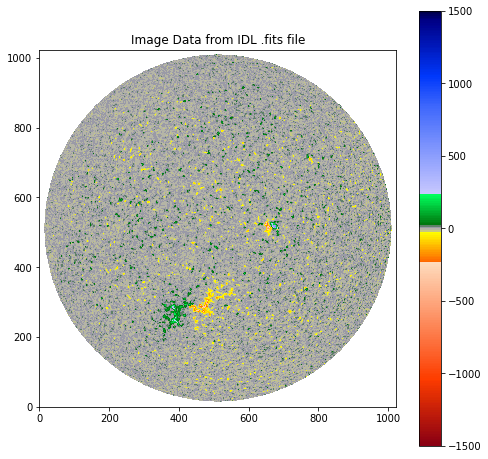

In [16]:
plt.figure(figsize=(8, 8))
plt.imshow(data, vmax = 1500, vmin = -1500, cmap='hmimag', origin='lower')  # Use cmap='gray' for grayscale images
plt.colorbar()
plt.title('Image Data from IDL .fits file')
plt.show()

In [43]:
def load_fits_image_sunpy(fits_file_path, vmin=-1500, vmax=1500):
    # Use sunpy to open the FITS file
    magnetogram_map = sunpy.map.Map(fits_file_path)
    image_data = magnetogram_map.data.astype(np.float32)  # Ensure data is in float32
    
    # Clip the data to be within the range [vmin, vmax]
    image_data = np.clip(image_data, vmin, vmax)
    
    # Normalize the clipped image data to [0, 1]
    image_data = (image_data - vmin) / (vmax - vmin)
    
    return image_data


In [41]:
def load_fits_image_sunpy(fits_file_path):
    # Use sunpy to open the FITS file
    magnetogram_map = sunpy.map.Map(fits_file_path)
    image_data = magnetogram_map.data.astype(np.float32)  # Ensure data is in float32
    
    # Handle NaN values if present
    if np.isnan(image_data).any():
        image_data = np.nan_to_num(image_data)
    
    # Normalize the image data to the same scale used in your example
    # Note: The normalization may differ based on specific use case
    image_data = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data))
    
    return image_data

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


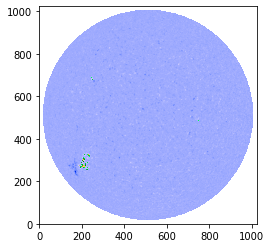

In [46]:
fits_file_path = "G:\\Sun_File_images\\Data\\mdi.fd_M_96m_lev182.19970102_204800_TAI.data.fits"
img = load_fits_image_sunpy(fits_file_path)
print(img)
plt.imshow(img, cmap = 'hmimag', origin = 'lower')

In [15]:
header = magnetogram_map.fits_header

In [16]:
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 1024 / length of original image axis                  
NAXIS2  =                 1024 / length of original image axis                  
BLANK   =          -2147483648                                                  
BZERO   =                  0.0                                                  
BSCALE  =                 0.01                                                  
CHECKSUM= 'YfEmYdClYdClYdCl'   / HDU checksum updated 2022-03-02T09:09:53       
T_REC   = '1997.01.02_20:48:00.000_TAI' / [TAI] Intended observation time       
T_OBS   = '1997.01.02_20:48:30.000_TAI' / [TAI] Actual (center) of integration t
DATE-OBS= '1997-01-02T20:47:45.000' / [ISO] [DATE                               
CDELT1  =   1.97734701633453

In [17]:
header['DATE-obs']

'1997-01-02T20:47:45.000'

In [ ]:
"G:\backp\mdi.fd_M_96m_lev182.19961231_000000_TAI.data.fits"

"G:\BMR_Identification\mdi_bmr_ind_19961228_0448.sav"

In [ ]:
"G:\Test\mdi.fd_M_96m_lev182.19961230_222400_TAI.data.fits"

In [3]:
import os
import sunpy.map
from astropy.io import fits

def rename_fits_file(fits_file_path):
    """
    Rename a FITS file according to the 'DATE-obs' attribute in its header, retaining the '.fits' extension.

    Parameters:
    fits_file_path (str): The file path to the FITS file.

    Returns:
    new_file_name (str): The new name for the FITS file with '.fits' extension.
    """
    # Read the FITS file using SunPy
    magnetogram_map = sunpy.map.Map(fits_file_path)
    header = magnetogram_map.fits_header
    
    # Extract the observation date from the header
    date_obs = header.get('DATE-obs', '')
    
    # Format the date and time to match the required new file name
    if date_obs:
        date_time = date_obs.replace('-', '').replace('T', '_').replace(':', '')[:13]
        new_file_name = f'mdi_bmr_ind_{date_time}.fits'
        
        # Rename the file
        base_path = os.path.dirname(fits_file_path)
        new_file_path = os.path.join(base_path, new_file_name)
        os.rename(fits_file_path, new_file_path)
        
        return new_file_name
    else:
        raise ValueError("The file does not have a 'DATE-obs' attribute.")

# Example usage (to be run in an environment with 'sunpy' and 'astropy' installed):
# fits_file_path = 'mdi.fd_M_96m_lev182.19970102_204800_TAI.data.fits'
# new_file_name = rename_fits_file(fits_file_path)
# print(new_file_name)


In [22]:
rename_fits_file("G:\\Test\\mdi.fd_M_96m_lev182.19961231_000000_TAI.data.fits")

'mdi_bmr_ind_19961230_2358.fits'

In [23]:
# Replace 'G:/Test' with the path to your directory
directory_path = 'G:\\Test'

# Check if the directory exists
if os.path.exists(directory_path):
    # Iterate over all files in the directory
    for filename in os.listdir(directory_path):
        # Check if the file is a FITS file
        if filename.lower().endswith('.fits'):
            # Construct the full file path
            fits_file_path = os.path.join(directory_path, filename)
            # Rename the FITS file
            try:
                new_file_name = rename_fits_file(fits_file_path)
                print(f"Renamed '{filename}' to '{new_file_name}'")
            except Exception as e:
                print(f"Error processing file '{filename}': {e}")
else:
    print(f"Directory '{directory_path}' does not exist.")

Renamed 'mdi.fd_M_96m_lev182.19961230_222400_TAI.data.fits' to 'mdi_bmr_ind_19961230_2222.fits'
Renamed 'mdi.fd_M_96m_lev182.19961231_000000_TAI.data.fits' to 'mdi_bmr_ind_19961230_2358.fits'
Renamed 'mdi.fd_M_96m_lev182.19961231_013600_TAI.data.fits' to 'mdi_bmr_ind_19961231_0136.fits'
Renamed 'mdi.fd_M_96m_lev182.19961231_031200_TAI.data.fits' to 'mdi_bmr_ind_19961231_0312.fits'
Renamed 'mdi.fd_M_96m_lev182.19961231_044800_TAI.data.fits' to 'mdi_bmr_ind_19961231_0448.fits'
Renamed 'mdi.fd_M_96m_lev182.19961231_062400_TAI.data.fits' to 'mdi_bmr_ind_19961231_0624.fits'
Renamed 'mdi.fd_M_96m_lev182.19961231_080000_TAI.data.fits' to 'mdi_bmr_ind_19961231_0800.fits'
Renamed 'mdi.fd_M_96m_lev182.19961231_093600_TAI.data.fits' to 'mdi_bmr_ind_19961231_0936.fits'
Renamed 'mdi.fd_M_96m_lev182.19961231_111200_TAI.data.fits' to 'mdi_bmr_ind_19961231_1112.fits'
Renamed 'mdi.fd_M_96m_lev182.19961231_142400_TAI.data.fits' to 'mdi_bmr_ind_19961231_1423.fits'
Renamed 'mdi.fd_M_96m_lev182.19961231_16

E:\anaconda\lib\site-packages\sunpy\map\mapbase.py:591: RuntimeWarning: All-NaN slice encountered
  threshold = np.nanmax(abs(self.data))


Renamed 'mdi.fd_M_96m_lev182.19971129_204800_TAI.data.fits' to 'mdi_bmr_ind_19971129_2048.fits'
Renamed 'mdi.fd_M_96m_lev182.19971129_222400_TAI.data.fits' to 'mdi_bmr_ind_19971129_2223.fits'
Renamed 'mdi.fd_M_96m_lev182.19971130_000000_TAI.data.fits' to 'mdi_bmr_ind_19971129_2359.fits'
Renamed 'mdi.fd_M_96m_lev182.19971130_013600_TAI.data.fits' to 'mdi_bmr_ind_19971130_0135.fits'
Renamed 'mdi.fd_M_96m_lev182.19971130_031200_TAI.data.fits' to 'mdi_bmr_ind_19971130_0311.fits'
Renamed 'mdi.fd_M_96m_lev182.19971130_044800_TAI.data.fits' to 'mdi_bmr_ind_19971130_0447.fits'
Renamed 'mdi.fd_M_96m_lev182.19971130_062400_TAI.data.fits' to 'mdi_bmr_ind_19971130_0624.fits'
Renamed 'mdi.fd_M_96m_lev182.19971130_080000_TAI.data.fits' to 'mdi_bmr_ind_19971130_0800.fits'
Renamed 'mdi.fd_M_96m_lev182.19971130_093600_TAI.data.fits' to 'mdi_bmr_ind_19971130_0936.fits'
Renamed 'mdi.fd_M_96m_lev182.19971130_111200_TAI.data.fits' to 'mdi_bmr_ind_19971130_1112.fits'
Renamed 'mdi.fd_M_96m_lev182.19971130_12

In [5]:
import os

def check_corresponding_files(sav_directory, fits_directory):
    """
    Check if each .sav file in the sav_directory has a corresponding .fits file in the fits_directory.

    Parameters:
    sav_directory (str): The directory containing .sav files.
    fits_directory (str): The directory containing .fits files.

    Returns:
    A list of .sav files that do not have corresponding .fits files.
    """
    # List to hold the names of .sav files without corresponding .fits files
    missing_files = []

    # Get a set of the base names of all .fits files (without the extension)
    fits_files = {os.path.splitext(file)[0] for file in os.listdir(fits_directory) if file.lower().endswith('.fits')}

    # Check each .sav file to see if its base name is in the set of .fits files
    for sav_file in os.listdir(sav_directory):
        if sav_file.lower().endswith('.sav'):
            sav_base = os.path.splitext(sav_file)[0]
            if sav_base not in fits_files:
                missing_files.append(sav_file)

    return missing_files

# Directories
sav_directory = 'G:\\BMR_Identification'
fits_directory = 'G:\\Test'

# Check for corresponding files
missing_files = check_corresponding_files(sav_directory, fits_directory)

# Output the result
if missing_files:
    print("The following .sav files do not have corresponding .fits files:")
    for file in missing_files:
        print(file)
else:
    print("All .sav files have corresponding .fits files in the Test directory.")


All .sav files have corresponding .fits files in the Test directory.


In [25]:
directory_path = 'G:\\missing'

# Check if the directory exists
if os.path.exists(directory_path):
    # Iterate over all files in the directory
    for filename in os.listdir(directory_path):
        # Check if the file is a FITS file
        if filename.lower().endswith('.fits'):
            # Construct the full file path
            fits_file_path = os.path.join(directory_path, filename)
            # Rename the FITS file
            try:
                new_file_name = rename_fits_file(fits_file_path)
                print(f"Renamed '{filename}' to '{new_file_name}'")
            except Exception as e:
                print(f"Error processing file '{filename}': {e}")
else:
    print(f"Directory '{directory_path}' does not exist.")

Renamed 'mdi.fd_M_96m_lev182.19961228_000000_TAI.data.fits' to 'mdi_bmr_ind_19961227_2358.fits'
Renamed 'mdi.fd_M_96m_lev182.19961228_013600_TAI.data.fits' to 'mdi_bmr_ind_19961228_0134.fits'
Renamed 'mdi.fd_M_96m_lev182.19961228_031200_TAI.data.fits' to 'mdi_bmr_ind_19961228_0312.fits'
Renamed 'mdi.fd_M_96m_lev182.19961228_044800_TAI.data.fits' to 'mdi_bmr_ind_19961228_0448.fits'
Renamed 'mdi.fd_M_96m_lev182.19961228_062400_TAI.data.fits' to 'mdi_bmr_ind_19961228_0624.fits'
Renamed 'mdi.fd_M_96m_lev182.19961228_080000_TAI.data.fits' to 'mdi_bmr_ind_19961228_0800.fits'
Renamed 'mdi.fd_M_96m_lev182.19961228_093600_TAI.data.fits' to 'mdi_bmr_ind_19961228_0936.fits'
Renamed 'mdi.fd_M_96m_lev182.19961228_111200_TAI.data.fits' to 'mdi_bmr_ind_19961228_1112.fits'
Renamed 'mdi.fd_M_96m_lev182.19961228_124800_TAI.data.fits' to 'mdi_bmr_ind_19961228_1248.fits'
Renamed 'mdi.fd_M_96m_lev182.19961228_142400_TAI.data.fits' to 'mdi_bmr_ind_19961228_1424.fits'
Renamed 'mdi.fd_M_96m_lev182.19961228_16

In [4]:
directory_path = 'G:\\missing2'

# Check if the directory exists
if os.path.exists(directory_path):
    # Iterate over all files in the directory
    for filename in os.listdir(directory_path):
        # Check if the file is a FITS file
        if filename.lower().endswith('.fits'):
            # Construct the full file path
            fits_file_path = os.path.join(directory_path, filename)
            # Rename the FITS file
            try:
                new_file_name = rename_fits_file(fits_file_path)
                print(f"Renamed '{filename}' to '{new_file_name}'")
            except Exception as e:
                print(f"Error processing file '{filename}': {e}")
else:
    print(f"Directory '{directory_path}' does not exist.")

Renamed 'mdi.fd_M_96m_lev182.19980113_062400_TAI.data.fits' to 'mdi_bmr_ind_19980113_0623.fits'
Renamed 'mdi.fd_M_96m_lev182.19980113_080000_TAI.data.fits' to 'mdi_bmr_ind_19980113_0759.fits'
Renamed 'mdi.fd_M_96m_lev182.19980113_093600_TAI.data.fits' to 'mdi_bmr_ind_19980113_0935.fits'
Renamed 'mdi.fd_M_96m_lev182.19980113_111200_TAI.data.fits' to 'mdi_bmr_ind_19980113_1111.fits'
Renamed 'mdi.fd_M_96m_lev182.19980113_124800_TAI.data.fits' to 'mdi_bmr_ind_19980113_1247.fits'
Renamed 'mdi.fd_M_96m_lev182.19980113_142400_TAI.data.fits' to 'mdi_bmr_ind_19980113_1424.fits'
Renamed 'mdi.fd_M_96m_lev182.19980113_160000_TAI.data.fits' to 'mdi_bmr_ind_19980113_1559.fits'
Renamed 'mdi.fd_M_96m_lev182.19980113_173600_TAI.data.fits' to 'mdi_bmr_ind_19980113_1735.fits'
Renamed 'mdi.fd_M_96m_lev182.19980113_191200_TAI.data.fits' to 'mdi_bmr_ind_19980113_1911.fits'
Renamed 'mdi.fd_M_96m_lev182.19980113_204800_TAI.data.fits' to 'mdi_bmr_ind_19980113_2047.fits'
Renamed 'mdi.fd_M_96m_lev182.19980113_22

E:\anaconda\lib\site-packages\sunpy\map\mapbase.py:591: RuntimeWarning: All-NaN slice encountered
  threshold = np.nanmax(abs(self.data))


Renamed 'mdi.fd_M_96m_lev182.19980120_173600_TAI.data.fits' to 'mdi_bmr_ind_19980120_1735.fits'
Renamed 'mdi.fd_M_96m_lev182.19980120_191200_TAI.data.fits' to 'mdi_bmr_ind_19980120_1911.fits'
Renamed 'mdi.fd_M_96m_lev182.19980120_204800_TAI.data.fits' to 'mdi_bmr_ind_19980120_2047.fits'
Renamed 'mdi.fd_M_96m_lev182.19980120_222400_TAI.data.fits' to 'mdi_bmr_ind_19980120_2223.fits'
Renamed 'mdi.fd_M_96m_lev182.19980121_000000_TAI.data.fits' to 'mdi_bmr_ind_19980120_2359.fits'
Renamed 'mdi.fd_M_96m_lev182.19980121_013600_TAI.data.fits' to 'mdi_bmr_ind_19980121_0135.fits'
Renamed 'mdi.fd_M_96m_lev182.19980121_031200_TAI.data.fits' to 'mdi_bmr_ind_19980121_0311.fits'
Renamed 'mdi.fd_M_96m_lev182.19980121_044800_TAI.data.fits' to 'mdi_bmr_ind_19980121_0447.fits'
Renamed 'mdi.fd_M_96m_lev182.19980121_062400_TAI.data.fits' to 'mdi_bmr_ind_19980121_0623.fits'
Renamed 'mdi.fd_M_96m_lev182.19980121_080000_TAI.data.fits' to 'mdi_bmr_ind_19980121_0759.fits'
Renamed 'mdi.fd_M_96m_lev182.19980121_09

# Rotating file

In [9]:
fits_file_path = "F:\\Test\\mdi_bmr_ind_19961231_0448.fits"

magnetogram_map = sunpy.map.Map(fits_file_path)


In [10]:
header = magnetogram_map.fits_header

In [11]:
header['CROTA2']

0.0

In [23]:
from scipy import ndimage
import sunpy.map
import astropy.units as u

def rotate_fits_data(fits_file_path):
    """
    Rotates the image data in a FITS file by the 'CROTA2' header value and sets 'CROTA2' to zero.

    Parameters:
    fits_file_path (str): The file path to the FITS file.

    Returns:
    new_magnetogram_map (Map): SunPy Map object of the rotated image.
    """
    # Load the FITS file
    magnetogram_map = sunpy.map.Map(fits_file_path)
    data = magnetogram_map.data
    header = magnetogram_map.fits_header
    
    # Get the rotation angle from 'CROTA2' and convert to degrees if necessary
    rotation_angle = header.get('CROTA2', 0) * u.deg
    
    # Rotate the image data
    rotated_data = ndimage.rotate(data, rotation_angle.value, reshape=False)
    
    # Update the header to set 'CROTA2' to zero
    header['CROTA2'] = 0
    
    # Create a new SunPy Map with the rotated data and updated header
    new_magnetogram_map = sunpy.map.Map(rotated_data, header)
    
    return new_magnetogram_map

# Example usage:
# fits_file_path = "F:\Test2\mdi_bmr_ind_19961231_0312.fits"
# new_magnetogram_map = rotate_fits_data(fits_file_path)
# new_magnetogram_map.peek()  # To display the rotated image if you are using an interactive environment


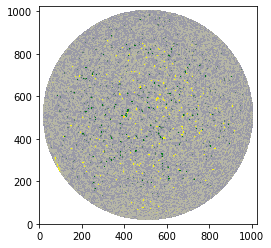

In [27]:
fits_file_path = "F:\\Test2\\mdi_bmr_ind_19961231_0312.fits"

magnetogram_map = sunpy.map.Map(fits_file_path)
data = magnetogram_map.data
plt.imshow(data,vmax = 1500, vmin = -1500, cmap = 'hmimag', origin = 'lower')

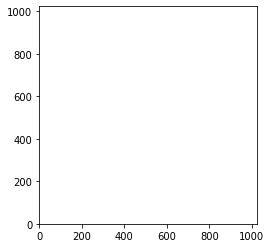

In [26]:
fits_file_path = "F:\\Test2\\mdi_bmr_ind_19961231_0312.fits"
new_magnetogram_map = rotate_fits_data(fits_file_path)
#magnetogram_map = sunpy.map.Map(fits_file_path)
data = new_magnetogram_map.data
plt.imshow(data,vmax = 1500, vmin = -1500, cmap = 'hmimag', origin = 'lower')
#new_magnetogram_map.peek()  # To display the rotated image if you are using an interactive environment

In [28]:
from scipy import ndimage
import sunpy.map
import astropy.units as u

def rotate_fits_data(fits_file_path, rotation_angle_degrees):
    """
    Rotates the image data in a FITS file by a specified angle and sets 'CROTA2' to zero.

    Parameters:
    fits_file_path (str): The file path to the FITS file.
    rotation_angle_degrees (float): The angle by which to rotate the image in degrees.

    Returns:
    new_magnetogram_map (Map): SunPy Map object of the rotated image.
    """
    # Load the FITS file
    magnetogram_map = sunpy.map.Map(fits_file_path)
    data = magnetogram_map.data
    header = magnetogram_map.fits_header
    
    # Rotate the image data
    rotated_data = ndimage.rotate(data, rotation_angle_degrees, reshape=False)
    
    # Update the header to set 'CROTA2' to zero
    header['CROTA2'] = 0
    
    # Create a new SunPy Map with the rotated data and updated header
    new_magnetogram_map = sunpy.map.Map(rotated_data, header)
    
    return new_magnetogram_map

# Example usage:
# fits_file_path = "F:\\Test\\mdi_bmr_ind_19961231_0448.fits"
# rotation_angle_degrees = 45  # Specify the rotation angle in degrees here
# new_magnetogram_map = rotate_fits_data(fits_file_path, rotation_angle_degrees)
# new_magnetogram_map.peek()  # To display the rotated image if you are using an interactive environment


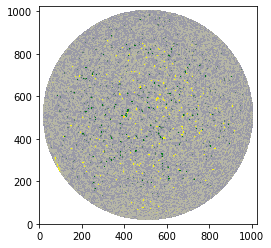

In [29]:
fits_file_path = "F:\\Test2\\mdi_bmr_ind_19961231_0312.fits"

magnetogram_map = sunpy.map.Map(fits_file_path)
data = magnetogram_map.data
plt.imshow(data,vmax = 1500, vmin = -1500, cmap = 'hmimag', origin = 'lower')

In [32]:
new = rotate_fits_data("F:\\Test2\\mdi_bmr_ind_19961231_0312.fits", 180)
data = new.data


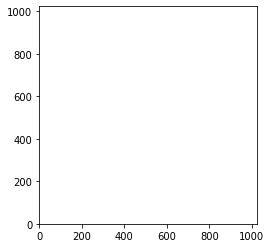

In [33]:
plt.imshow(data,vmax = 1500, vmin = -1500, cmap = 'hmimag', origin = 'lower')

In [34]:
import os
import sunpy.map

def count_crota2_zero(directory):
    """
    Counts the number of FITS files in a directory where 'CROTA2' equals zero using SunPy.

    Parameters:
    directory (str): The path to the directory containing FITS files.

    Returns:
    int: The count of FITS files with 'CROTA2' equal to zero.
    """
    crota2_zero_count = 0

    # Iterate over all files in the directory
    for file in os.listdir(directory):
        # Check if the file is a FITS file
        if file.lower().endswith('.fits'):
            # Construct the full file path
            file_path = os.path.join(directory, file)
            # Read the FITS file using SunPy
            magnetogram_map = sunpy.map.Map(file_path)
            # Get the header
            header = magnetogram_map.fits_header
            # Check if 'CROTA2' is in the header and equals zero
            if header.get('CROTA2', None) == 0:
                crota2_zero_count += 1

    return crota2_zero_count

# Example usage:
# directory = "G:\\Sun_File_images\\Data"
# print(f"Number of FITS files with 'CROTA2' equal to zero: {count_crota2_zero(directory)}")


In [39]:
import os
import sunpy.map

def count_crota2_zero(directory):
    """
    Counts the number of FITS files in a directory where the header has 'CROTA2' = 0.
    
    Parameters:
    directory (str): The path to the directory containing the FITS files.
    
    Returns:
    int: The count of FITS files with 'CROTA2' = 0 in the header.
    """
    
    count = 0  # Initialize the counter for files
    
    # Loop through all the files in the directory
    for file in os.listdir(directory):
        # Construct the full file path
        file_path = os.path.join(directory, file)
        
        # Check if the file is a FITS file
        if file_path.lower().endswith('.fits'):
            try:
                # Open the FITS file as a sunpy map
                magnetogram_map = sunpy.map.Map(file_path)
                
                # Check if 'CROTA2' in header is 0
                if magnetogram_map.fits_header['CROTA2']!=0:
                    count += 1  # Increment the counter
            except Exception as e:
                print(f"Could not process {file_path}: {e}")
    
    return count

# Example usage:
# directory_path = "F:\\Test"  # Set this to the actual directory path
# print(count_crota2_zero(directory_path))


In [41]:
print(count_crota2_zero("F:\\Test"))

0


In [1]:
import os
import shutil

# Function to check if the .sav file has a .fits counterpart in another directory
def copy_fits_if_sav_exists(sav_directory, fits_directory, destination_directory):
    # List all files in the sav directory
    sav_files = [f for f in os.listdir(sav_directory) if f.endswith('.sav')]
    
    # Check each .sav file to see if a corresponding .fits file exists in the fits directory
    for sav_file in sav_files:
        # Construct the name of the .fits file based on the .sav file
        fits_file = sav_file.replace('.sav', '.fits')
        
        # Check if this .fits file exists in the fits directory
        if fits_file in os.listdir(fits_directory):
            # Construct full file paths
            source_file = os.path.join(fits_directory, fits_file)
            destination_file = os.path.join(destination_directory, fits_file)
            
            # Copy the .fits file to the destination directory
            shutil.copy2(source_file, destination_file)
            print(f"Copied {fits_file} to {destination_directory}")
        else:
            print(f"No corresponding .fits file found for {sav_file}")

# Example usage of the function
# Note: You need to replace 'G:/BMR_Identification', 'G:/Test', and 'G:/Sun_Images_Final'
# with the actual paths on your filesystem where the Python script has read access.

sav_directory = 'G:\\BMR_Identification'
fits_directory = 'G:\\Test'
destination_directory = 'G:\\Sun_Images_Final'

copy_fits_if_sav_exists(sav_directory, fits_directory, destination_directory)


Copied mdi_bmr_ind_19961228_0448.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19961231_0624.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19970102_0312.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19970103_1423.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19970103_1559.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19970103_1735.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19970103_1911.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19970103_2047.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19970103_2223.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19970103_2359.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19970104_0135.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19970104_0312.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19970104_0448.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19970104_0624.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19970104_0800.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19970104_0935.fits to G:\Sun_Images_Final
Copied mdi_bmr_ind_19970

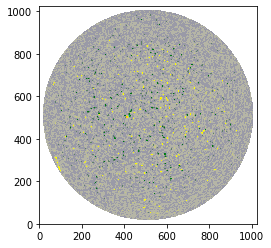

In [51]:
fits_file_path = "G:\\Sun_Images_Final\\mdi_bmr_ind_19961231_0624.fits"
magnetogram_map = sunpy.map.Map(fits_file_path)
data = magnetogram_map.data
plt.imshow(data,vmax = 1500, vmin = -1500, cmap = 'hmimag', origin = 'lower')

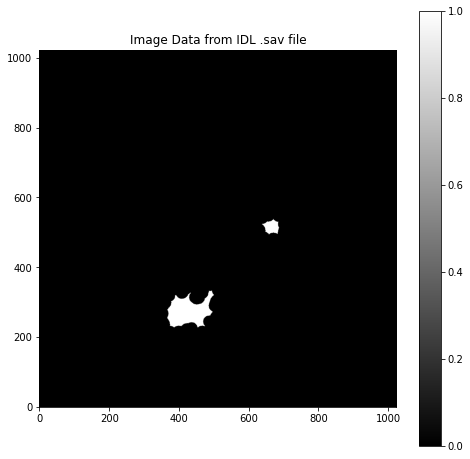

In [18]:

# Replace 'path_to_file.sav' with the path to your .sav file
sav_file_path = "F:\\BMR_Identification\\mdi_bmr_ind_19970105_2223.sav"

# Read the .sav file
idl_data = readsav(sav_file_path)

# Assuming idl_data is already loaded and is a dictionary-like object
# hdr_los would typically be the header with the image's metadata
hdr_los = idl_data['hdr_los']

# Assuming the 'naxis1' and 'naxis2' are attributes of hdr_los that specify the image dimensions
naxis1 = hdr_los.naxis1[0]  # Accessing the first element if it's a one-element array
naxis2 = hdr_los.naxis2[0]  # Accessing the first element if it's a one-element array

# Create an empty image array based on the dimensions specified in the header
image_data = np.zeros((naxis2, naxis1))

# bmr_ind are the indices in the image array that should be set to 1
# We need to convert these indices into 2D indices
# This assumes bmr_ind is a flat index into the 2D image_data array
bmr_ind = idl_data['bmr_ind']

# Calculate the 2D indices from the 1D flat indices
rows, cols = np.divmod(bmr_ind, naxis1)

# Set the specified indices in the image_data array to 1
image_data[rows, cols] = 1

# Now, visualize the image_data array
plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Image Data from IDL .sav file')
plt.show()


In [53]:
import os
import shutil

def move_name_alike_files(src_directory, target_directory, destination_directory):
    """
    Move files from target_directory to destination_directory if their name-alike exists in src_directory.

    :param src_directory: Directory containing the .sav files
    :param target_directory: Directory containing the .fits files
    :param destination_directory: Directory to move the name-alike files to
    """

    # Get a list of all .sav files in the source directory
    src_files = [f for f in os.listdir(src_directory) if f.endswith('.sav')]

    # Get a list of all files in the target directory
    target_files = os.listdir(target_directory)

    # Loop through each file in the source directory
    for file in src_files:
        # Create the name-alike by replacing the extension
        name_alike = file.replace('.sav', '.fits')

        # Check if the name-alike exists in the target directory
        if name_alike in target_files:
            # Construct full file paths
            target_file_path = os.path.join(target_directory, name_alike)
            destination_file_path = os.path.join(destination_directory, name_alike)

            # Move the file from the target to the destination directory
            shutil.move(target_file_path, destination_file_path)

# Paths for the directories
src_directory = 'G:/Validation/Y_test'
target_directory = 'G:/Sun_Images_Final'
destination_directory = 'G:/Validation/X_test'

# Call the function
move_name_alike_files(src_directory, target_directory, destination_directory)


In [54]:
import os
import shutil

def move_name_alike_files(src_directory, target_directory, destination_directory):
    """
    Move files from target_directory to destination_directory if their name-alike exists in src_directory.

    :param src_directory: Directory containing the .sav files
    :param target_directory: Directory containing the .fits files
    :param destination_directory: Directory to move the name-alike files to
    """

    # Get a list of all .sav files in the source directory
    src_files = [f for f in os.listdir(src_directory) if f.endswith('.sav')]

    # Get a list of all files in the target directory
    target_files = os.listdir(target_directory)

    # Loop through each file in the source directory
    for file in src_files:
        # Create the name-alike by replacing the extension
        name_alike = file.replace('.sav', '.fits')

        # Check if the name-alike exists in the target directory
        if name_alike in target_files:
            # Construct full file paths
            target_file_path = os.path.join(target_directory, name_alike)
            destination_file_path = os.path.join(destination_directory, name_alike)

            # Move the file from the target to the destination directory
            shutil.move(target_file_path, destination_file_path)

# Paths for the directories
src_directory = "G:\\BMR_Identification"
target_directory = 'G:\\Sun_Images_Final'
destination_directory = "G:\\Train\\X_train"

# Call the function
move_name_alike_files(src_directory, target_directory, destination_directory)
